<h1>INFOSYS SPRINGBOARD</h1><h3 align='right'>Tushar Bhagat</h3>

<div style="border-radius:10px; padding: 15px; background-color: #C1FDBC; font-size:130%; text-align:left">

<h2 align="left"><font color=black> Building Anomaly Detection System using Python </font></h2>
<h4>(Autoencoder approach)</h4>

<div style="border-radius:10px; padding: 15px; background-color: #87CEEB; font-size:130%; text-align:left">

<h2 align="left"><font color=black>Problem Statement:</font></h2>


In this project, we delve deep into the thriving sector of __Security__ by analyzing a __Anomaly detection on Healthcare Dataset__ from a USA-based Health Service Providers, available at the kaggle. This dataset documents all transactions between patients and service providers. Our primary objective is to amplify the efficiency of Healthcare System and avoid fraudulent transactions in __Healthcare system__. We aim to transform the data into a -centric dataset  that will facilitate the Base for Anomaly Detection system of patient providing better service , ultimately enhancing security ,efficiency and patient service.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from tensorflow.keras.utils import plot_model

In [2]:
X_data_scaled = pd.read_csv(r'C:\Users\tmbha\Downloads\ifosys_springboard\df.csv')

In [3]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['Name','Full Address']

# List of columns that need to be scaled
columns_to_scale = X_data_scaled.columns.difference(columns_to_exclude)

# Applying the scaler to the necessary columns in the dataset
X_data_scaled[columns_to_scale] = scaler.fit_transform(X_data_scaled[columns_to_scale])

# Dropping identifiers 
DropCols = ['Name','Full Address']
X_data_scaled = X_data_scaled.drop(DropCols, axis = 1)

# Display the first few rows of the scaled data
X_data_scaled.head().T


,0,1,2,3,4
Number of Services,-0.085301,-0.025939,-0.083296,-0.088109,-0.082895
Number of Medicare Beneficiaries,-0.059308,0.076775,-0.069222,-0.064716,-0.059308
Number of Distinct Medicare Beneficiary/Per Day Services,-0.070183,0.020049,-0.067135,-0.074451,-0.067744
Average Medicare Allowed Amount,0.385450,0.086673,-0.041922,-0.380709,-0.291221
Average Submitted Charge Amount,-0.046433,0.182805,-0.187794,-0.328957,-0.296019
Average Medicare Payment Amount,0.400082,0.207649,-0.064687,-0.370166,-0.289505
Average Medicare Standardized Amount,0.414299,0.286359,-0.087154,-0.372921,-0.294800
Diff_submitted_allowed,-0.166975,0.193356,-0.212261,-0.282934,-0.269463
Is_US,0.007746,0.007746,0.007746,0.007746,0.007746
Gender,-1.560716,-1.560716,0.640731,0.640731,0.640731


In [4]:


# Define the autoencoder model
input_dim = X_data_scaled.shape[1]

input_layer = Input(shape=(input_dim,))
encoding_layer1 = Dense(32, activation='relu')(input_layer)
encoding_layer2 = Dense(16, activation='relu')(encoding_layer1)
encoded = Dense(input_dim, activation='relu')(encoding_layer1)

decoding_layer1 = Dense(16, activation='relu')(encoded)
decoding_layer2 = Dense(32, activation='relu')(decoding_layer1)
decoder = Dense(input_dim, activation='sigmoid')(decoding_layer2)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder on the entire dataset
autoencoder.fit(X_data_scaled, X_data_scaled, epochs=50, batch_size=32, shuffle=True)


Epoch 1/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.8599
Epoch 2/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.7588
Epoch 3/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.7640
Epoch 4/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.7728
Epoch 5/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.8733
Epoch 6/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.7954
Epoch 7/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.0640
Epoch 8/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.7331
Epoch 9/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.7776
Epoch 10/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.9520
Epoch 11/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.7702
Epoch 12/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.7448
Epoch 13/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.8789
Epoch 14/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.6803
Epoch 15/50
3125/3125

In [5]:
#displaying summary of model architecture 
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 19)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 19)                  │             627 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 19)                  │             627 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,276 (32.33 KB)

 Trainable params: 2,758 (10.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,518 (21.56 KB)

<div style="border-radius:10px; padding: 15px; background-color: #5CE0F2; font-size:120%; text-align:left">
<h3 align="left"><font color=black>Inferences from the Summary :</font></h3>

<h4 align="left"><font color=black>The autoencoder model consists of the following layers:</font></h4>
    
- There are total 1000 anomalies are present in data based on the reconstruction error which cross the threshold .

- **Input Layer:** The input layer takes in data with 19 features.
    
- **Dense Layers:**
  - The first dense layer has 32 units and 640 parameters.
  - The second dense layer has 19 units and 627 parameters.
  - The third dense layer has 16 units and 320 parameters.
  - The fourth dense layer has 32 units and 542 parameters.
  - The final dense layer has 19 units and 627 parameters.
    
- **Total Parameters:** The model has a total of 8,276 parameters, 2,758 of which are trainable.

In [6]:
# Reconstruct the Data and Calculate Reconstruction Error
X_data_reconstructed = autoencoder.predict(X_data_scaled)
reconstruction_errors = np.mean(np.square(X_data_scaled - X_data_reconstructed), axis=1)

#setting threshold
threshold = np.percentile(reconstruction_errors, 99) 

# Detect anomalies
anomalies = reconstruction_errors > threshold

print("Anomalies detected:", anomalies)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
Anomalies detected: 0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool


In [7]:
reconstruction_errors

0        0.266990
1        0.187374
2        0.283561
3        0.071734
4        0.184675
           ...   
99995    0.310591
99996    0.604383
99997    0.171216
99998    0.185248
99999    0.188035
Length: 100000, dtype: float64

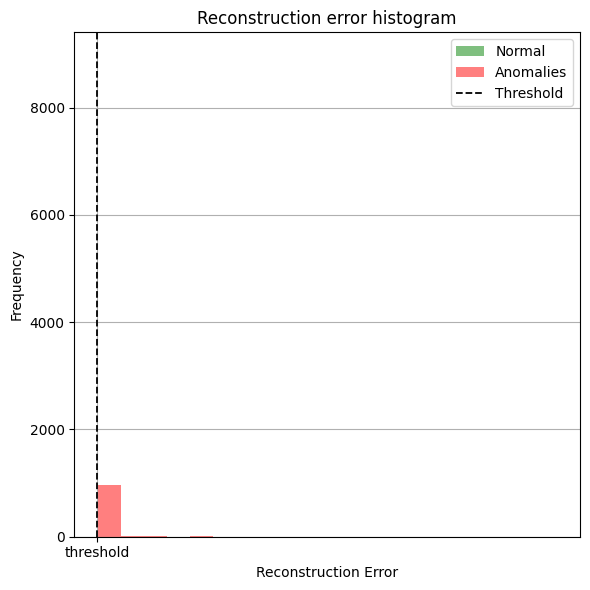

In [8]:
#separating normal and anomalies based on reconstruction_error
normal_errors = reconstruction_errors[~anomalies]
anomaly_errors = reconstruction_errors[anomalies]

#plotting histogram
fig, ax = plt.subplots(figsize=(6,6))
ax.hist(normal_errors ,bins=100 ,color='green' ,alpha=.5 ,label='Normal')
ax.hist(anomaly_errors ,bins=20 ,color='red' ,alpha=.5 ,label='Anomalies')
plt.axvline(x='threshold' ,color='k' ,linestyle='--', linewidth=1.3, label='Threshold')

plt.title('Reconstruction error histogram')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

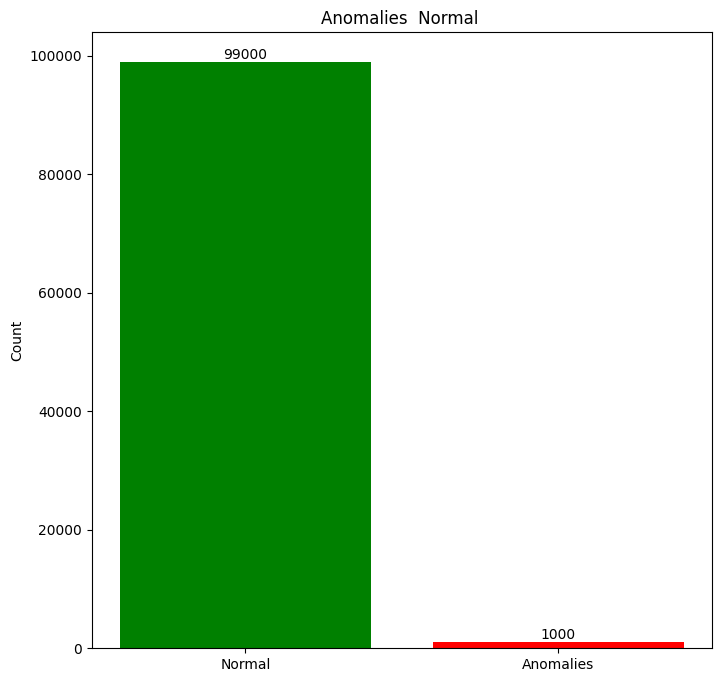

In [9]:
normal_errors = sum(~anomalies)
anomaly_errors = sum(anomalies)

plt.figure(figsize=(8, 8))
plot =  plt.bar(['Normal', 'Anomalies'], [normal_errors , anomaly_errors ], color=['green', 'red'])
plt.ylabel('Count')
plt.title('Anomalies  Normal ')

for bar in plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.show()



<div style="border-radius:10px; padding: 15px; background-color: #5CE0F2; font-size:120%; text-align:left">
<h3 align="left"><font color=black>Inferences from the Histogram :</font></h3>
    
- There are total 1000 anomalies are present in data based on the reconstruction error which cross the threshold .


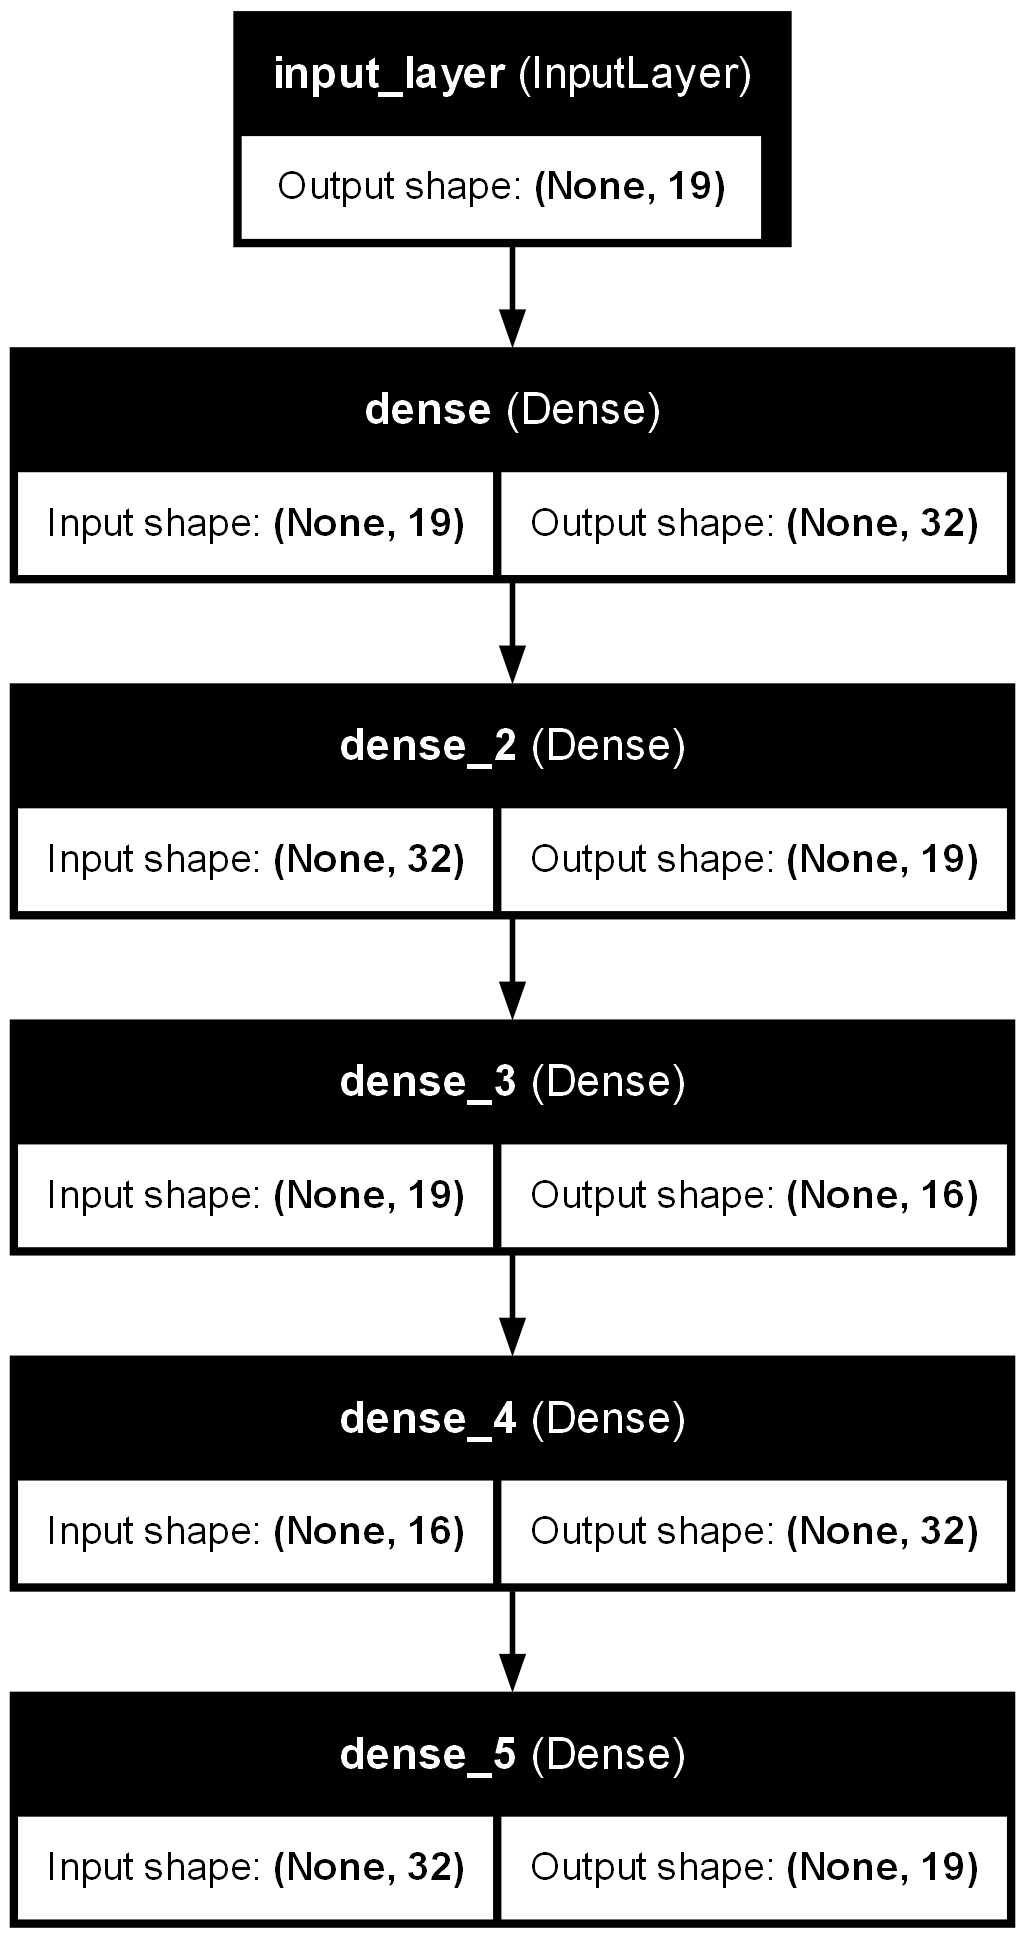

In [10]:

plot_model(autoencoder,to_file='C:/Users/tmbha/Downloads/ifosys_springboard/autoencoder_model.png',show_shapes=True,show_layer_names=True)


<div style="border-radius:10px; padding: 15px; background-color: #5CE0F2; font-size:120%; text-align:left">
<h3 align="left"><font color=black>Inferences from the Architecture :</font></h3>
    
- There are total 5 layers are present 1 input and 4 Dense layer .


<div style="border-radius:10px; padding: 15px; background-color: #5CE0F2; font-size:120%; text-align:left">
<h3 align="left"><font color=black>Inferences from the Architecture :</font></h3>
    
- The image visually represent the model architecture representing layer names and their respective input and output .


In [11]:
df = pd.read_csv(r'C:\Users\tmbha\Downloads\ifosys_springboard\df_processed.csv')

In [12]:
df['Is_Anomaly'] = [1 if x == True else 0 for x in anomalies]

In [13]:
df.head(5).T

,0,1,2,3,4
Credentials of the Provider,MD,MD,DPM,MD,DO
Gender of the Provider,F,F,M,M,M
Entity Type of the Provider,I,I,I,I,I
City of the Provider,SAINT LOUIS,FAYETTEVILLE,NORTH HAVEN,KANSAS CITY,JUPITER
State Code of the Provider,MO,NC,CT,MO,FL
Country Code of the Provider,US,US,US,US,US
ProviderType,Internal Medicine,Obstetrics & Gynecology,Podiatry,Internal Medicine,Internal Medicine
Medicare Participation Indicator,Y,Y,Y,Y,Y
Place of Service,F,O,O,O,O
HCPCS Description,"Initial hospital inpatient care, typically 70 ...","Screening mammography, bilateral (2-view study...","Established patient home visit, typically 25 m...","Urinalysis, manual test",Injection beneath the skin or into muscle for ...


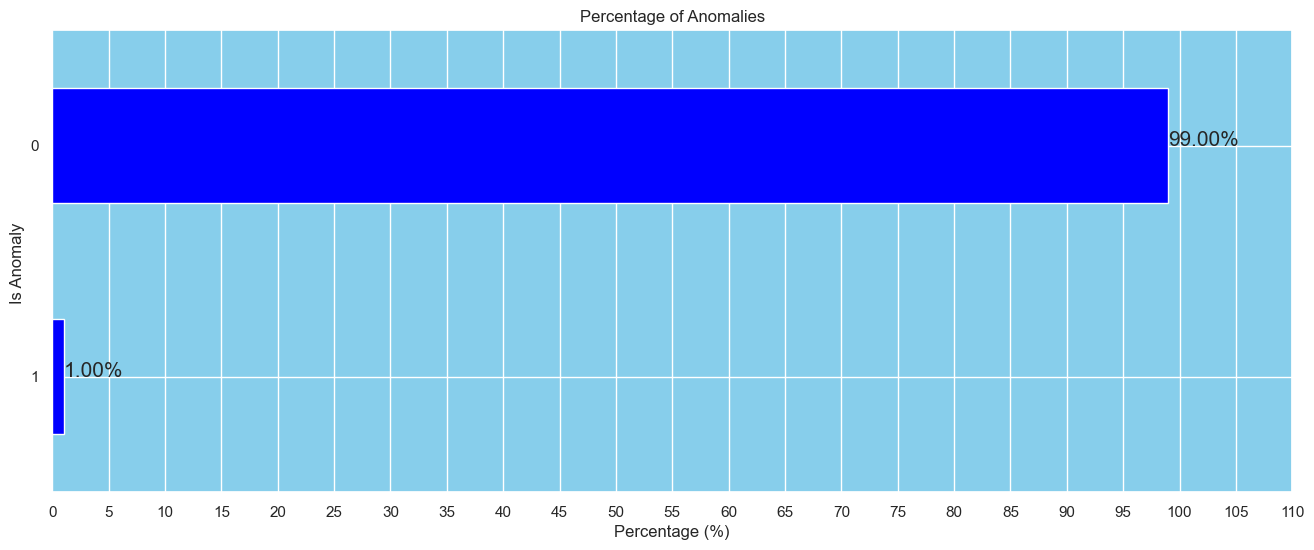

In [14]:
# Set seaborn plot style
sns.set(rc={'axes.facecolor': 'skyblue'}, style='darkgrid')

# Calculate the percentage of anomalies
anomalies_percentage = df['Is_Anomaly'].value_counts(normalize=True) * 100

# Plotting the percentage of anomalies
plt.figure(figsize=(16,6))
anomalies_percentage.plot(kind='barh', color='Blue')

# Adding the percentage labels on the bars
for index, value in enumerate(anomalies_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Anomalies')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Anomaly ')
plt.gca().invert_yaxis()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: pink; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inferences from the Graph :</font></h3>
    
- There are total __1.00%__ anomalies are detected by our model i.e.around 1000 entries in entire dataset    .


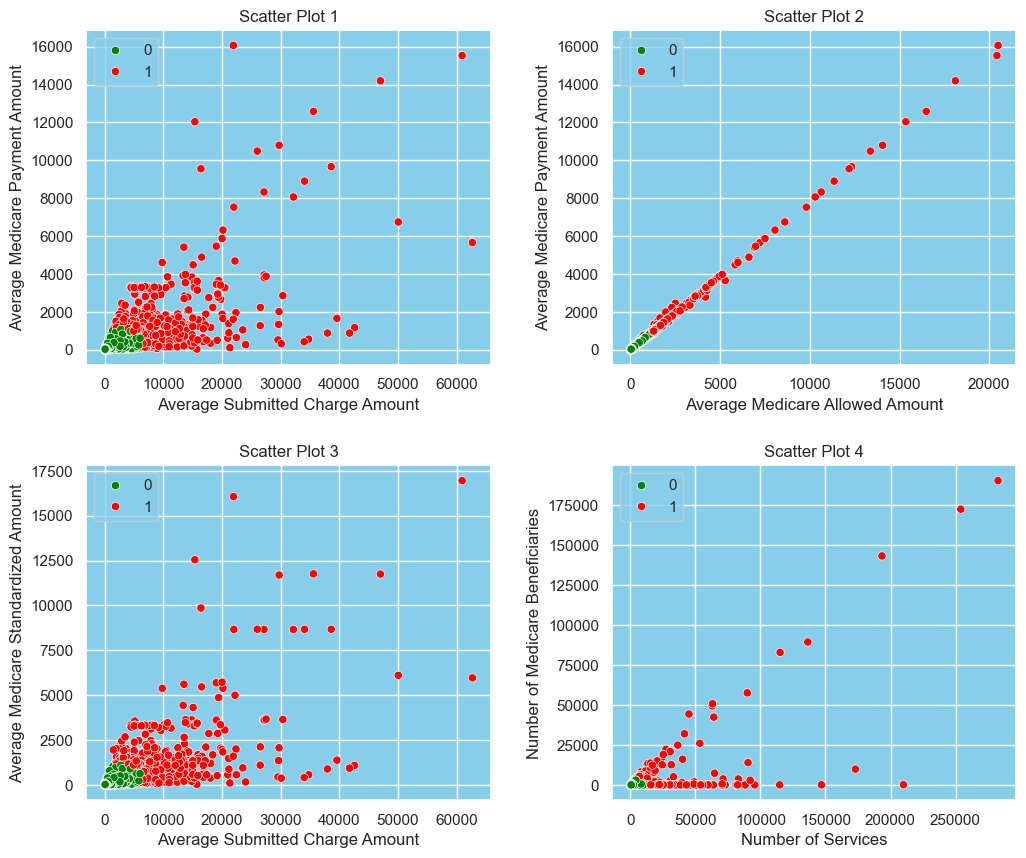

In [15]:
sns.set(rc={'axes.facecolor': 'skyblue'}, style='darkgrid')
fig, axs = plt.subplots(2,2, figsize=(12,10))

#Scatter plot 1
sns.scatterplot(x='Average Submitted Charge Amount', y='Average Medicare Payment Amount',data=df, hue='Is_Anomaly',ax=axs[0,0],
               palette=['green','red'])
axs[0,0].set_title('Scatter Plot 1')
axs[0,0].set_xlabel('Average Submitted Charge Amount')
axs[0,0].set_ylabel('Average Medicare Payment Amount')
axs[0,0].legend()

#Scatter plot 2
sns.scatterplot(x='Average Medicare Allowed Amount', y='Average Medicare Payment Amount',data=df, hue='Is_Anomaly',ax=axs[0,1],
               palette=['green','red'])
axs[0,1].set_title('Scatter Plot 2')
axs[0,1].set_xlabel('Average Medicare Allowed Amount')
axs[0,1].set_ylabel('Average Medicare Payment Amount')
axs[0,1].legend()

#Scatter plot 3
sns.scatterplot(x='Average Submitted Charge Amount', y='Average Medicare Standardized Amount',data=df, hue='Is_Anomaly',ax=axs[1,0],
               palette=['green','red'])
axs[1,0].set_title('Scatter Plot 3')
axs[1,0].set_xlabel('Average Submitted Charge Amount')
axs[1,0].set_ylabel('Average Medicare Standardized Amount')
axs[1,0].legend()

#Scatter plot 4
sns.scatterplot(x='Number of Services', y='Number of Medicare Beneficiaries',data=df, hue='Is_Anomaly',ax=axs[1,1],
               palette=['green','red'])
axs[1,1].set_title('Scatter Plot 4')
axs[1,1].set_xlabel('Number of Services')
axs[1,1].set_ylabel('Number of Medicare Beneficiaries')
axs[1,1].legend()

plt.subplots_adjust(wspace=0.3,hspace=0.3)

plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #8DFC65; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Inferences from the Scatter-Plots :</font></h3>
    
- By Visualizing the __Scatter Plots__ we can see that our __Autoencoder__  works well, and our model is able to distinguish between Normal points and Anomalies.
- There is __clear separation__ can be seen between the normal and anomalous point
- __Green__ dots indicates the __Normal__ points while __red__ dots indicates __Anomaly__.

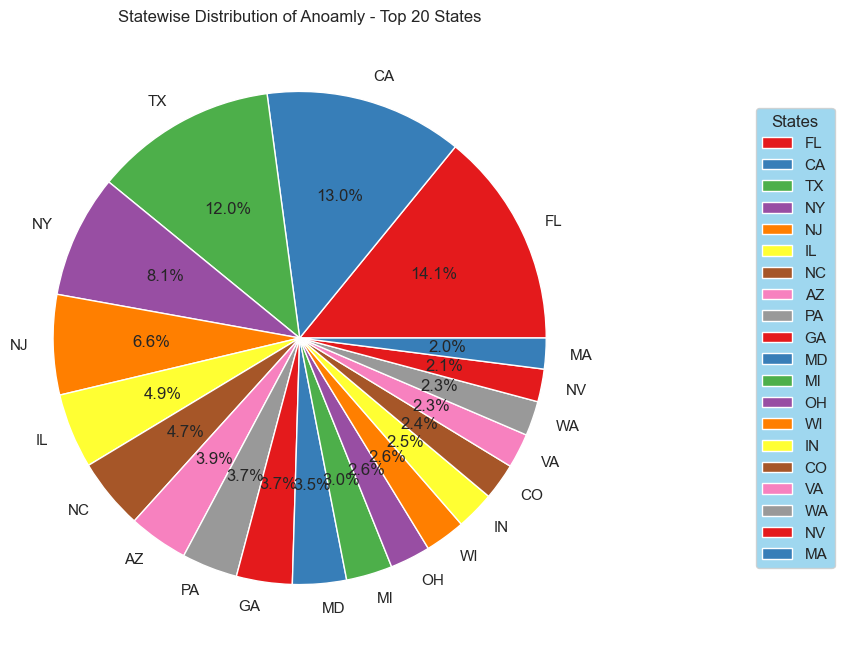

In [16]:
#filtering States with rows which has anomaly 
States_with_anomalies = df[df['Is_Anomaly']==1]['State Code of the Provider']

# counting the States with occurence
State_counts = States_with_anomalies.value_counts(normalize=True).head(20)

#creating pie chart
plt.figure(figsize=(7,8))
plt.pie(State_counts,labels=State_counts.index, autopct='%1.1f%%',colors=sns.color_palette('Set1'))
plt.axis('equal')
plt.title('Statewise Distribution of Anoamly - Top 20 States')
plt.legend(title='States' ,loc='center right',bbox_to_anchor=(1,0,0.5,1))
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #73FBFD; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Inferences from the Pie-Chart :</font></h3>
    
- The pie chart shows __Top 20 state__ with anomaly percentage where __Florida__ has highest no of anomalies __14.1%__ followed by  __California__ __13.0%__, __Texas__ __12.0%__ .


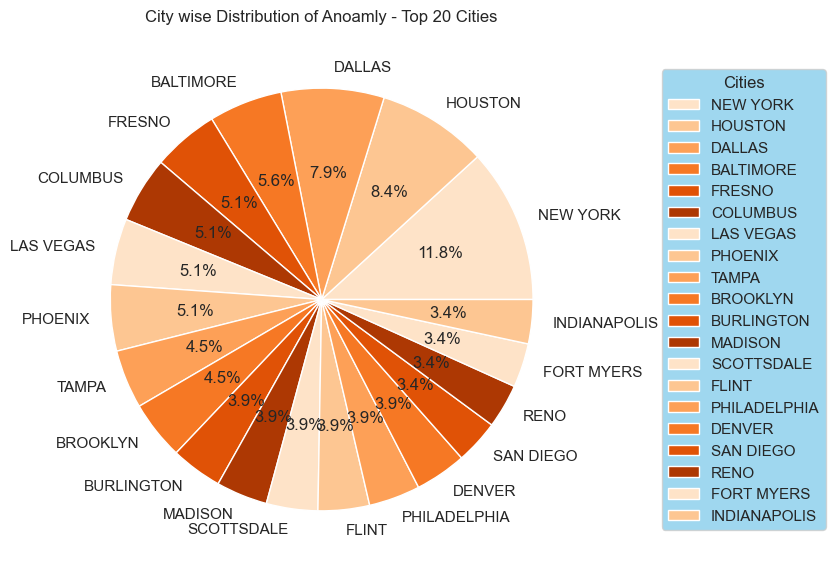

In [17]:
#filtering cities with rows which has anomaly 
cities_with_anomalies = df[df['Is_Anomaly']==1]['City of the Provider']

# counting the cities with occurence
city_counts = cities_with_anomalies.value_counts(normalize=True).head(20)

#creating pie chart
plt.figure(figsize=(6,7))
plt.pie(city_counts,labels=city_counts.index, autopct='%1.1f%%',colors=sns.color_palette('Oranges'))
plt.title('City wise Distribution of Anoamly - Top 20 Cities')
plt.legend(title='Cities' ,loc='center right',bbox_to_anchor=(1,0,0.6,1))
plt.axis('equal')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #73FBFD; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Inferences from the Pie-Chart :</font></h3>
    
- The pie chart shows __Top 20 Cities__ with anomaly percentage where __New York__ has highest no of anomalies __11.8%__ followed by __Houston__ __8.4%__ and __Dallas__ __7.9%__ .


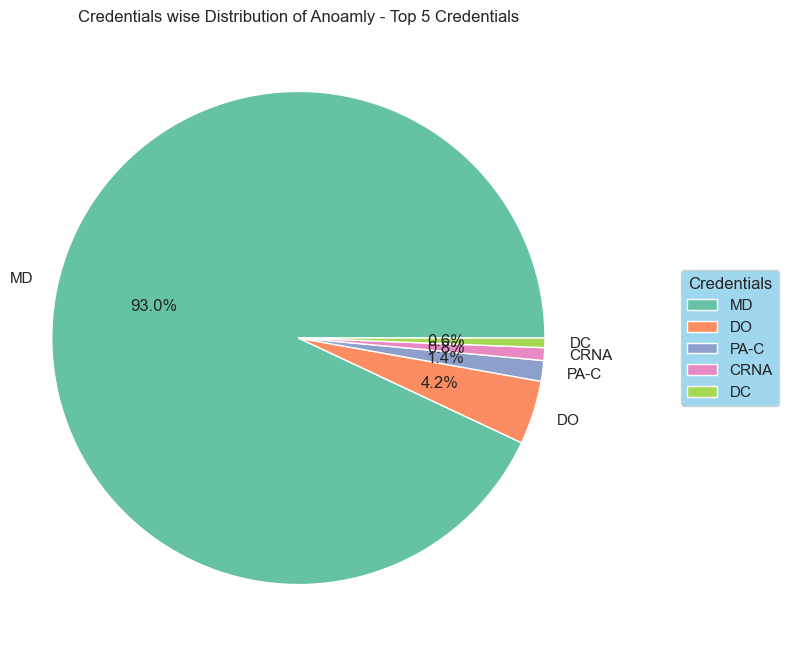

In [18]:
#filtering Credentials of the Provider with rows which has anomaly 
Credentials_with_anomalies = df[df['Is_Anomaly']==1]['Credentials of the Provider']

# counting the Credentials with occurence
Credential_counts = Credentials_with_anomalies.value_counts(normalize=True).head(5)

#creating pie chart
plt.figure(figsize=(7,8))
plt.pie(Credential_counts,labels=Credential_counts.index, autopct='%1.1f%%',colors=sns.color_palette('Set2'))
plt.title('Credentials wise Distribution of Anoamly - Top 5 Credentials')
plt.axis('equal')
plt.legend(title='Credentials' ,loc='center right',bbox_to_anchor=(1,0,0.4,1))
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #73FBFD; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Inferences from the Pie-Chart :</font></h3>
    
- The pie chart shows __Top 5 Credentials__ with anomaly percentage where __MD__ has highest no of anomalies __93.0%__ followed by __DO__ __4.2%__,  __PA-C__ __1.4%__ .


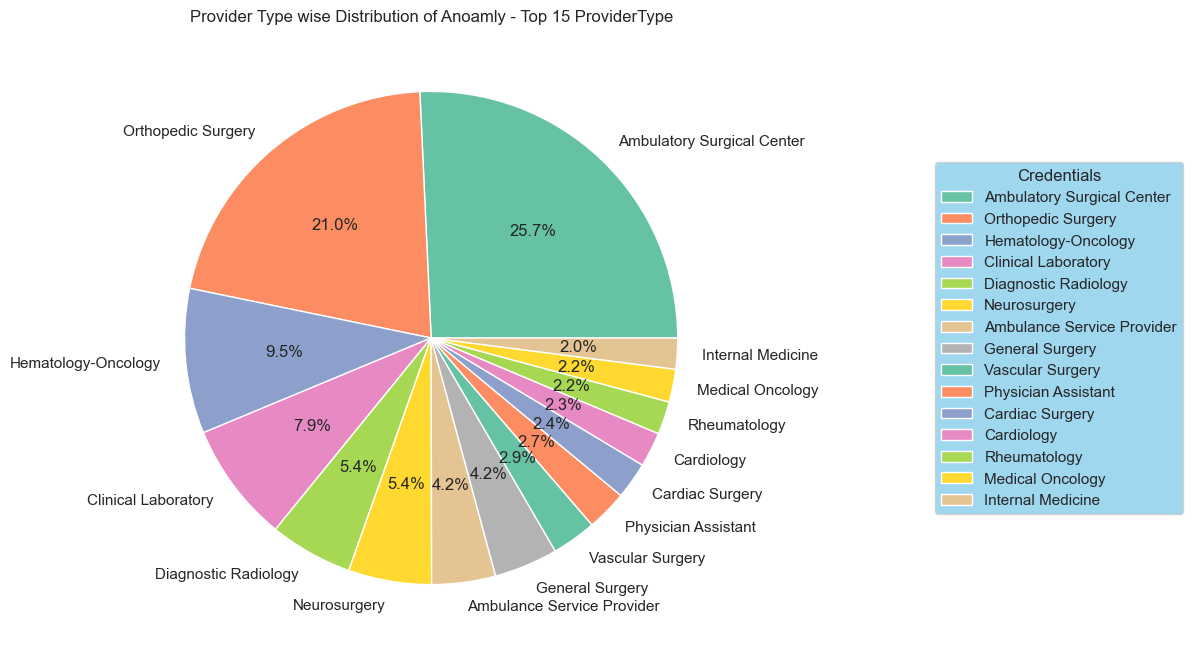

In [19]:
#filtering ProviderType with rows which has anomaly 
ProviderType_with_anomalies = df[df['Is_Anomaly']==1]['ProviderType']

# counting the ProviderType with occurence
ProviderType_counts = ProviderType_with_anomalies.value_counts(normalize=True).head(15)

#creating pie chart
plt.figure(figsize=(7,8))
plt.pie(ProviderType_counts,labels=ProviderType_counts.index, autopct='%1.1f%%',colors=sns.color_palette('Set2'))
plt.title('Provider Type wise Distribution of Anoamly - Top 15 ProviderType')
plt.axis('equal')
plt.legend(title='Credentials' ,loc='center right',bbox_to_anchor=(1,0,0.9,1))
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #73FBFD; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Inferences from the Pie-Chart :</font></h3>
    
- The pie chart shows __Top 15 ProviderType__ with anomaly percentage where __Ambulatory Surgical Center__ has highest no of anomalies __25.7%__ followed by __Orthopedic Surgery__ __21.0%__,  __Hematology-Oncology__ __9.5%__ .


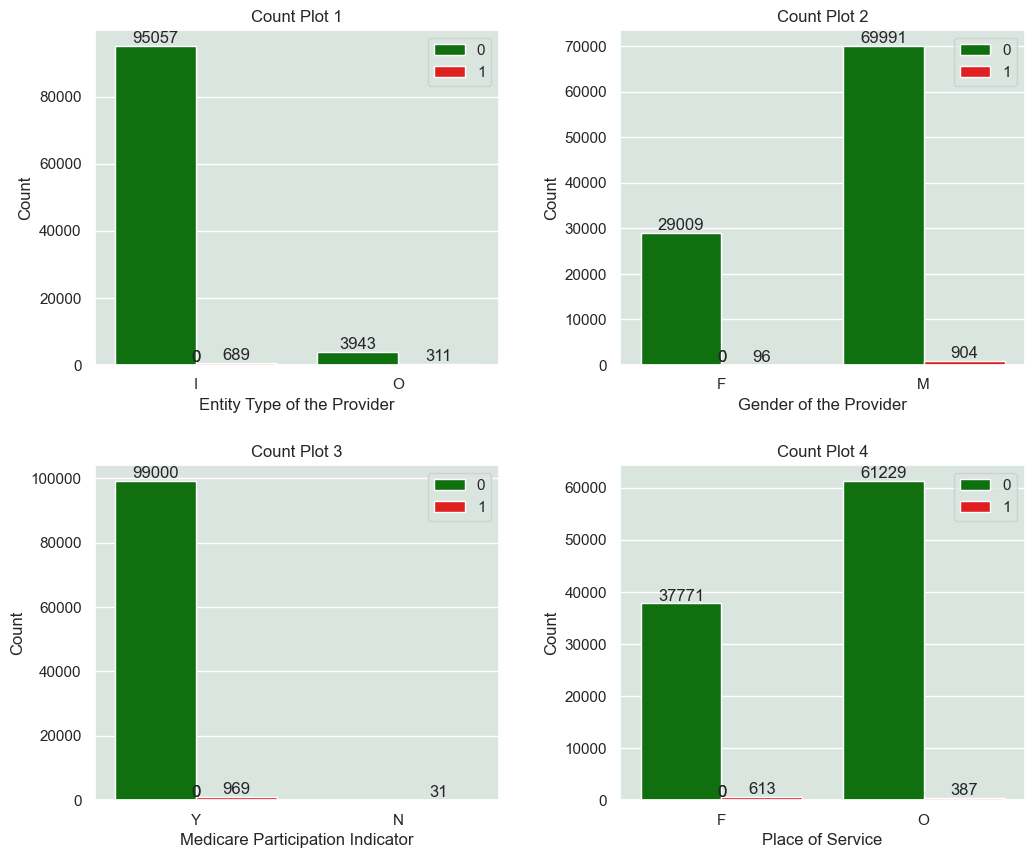

In [20]:
sns.set(rc={'axes.facecolor': '#DAE5E0'}, style='darkgrid')
fig, axs = plt.subplots(2,2, figsize=(12,10))

#Count plot 1
sns.countplot(x='Entity Type of the Provider',data=df, hue='Is_Anomaly',ax=axs[0,0],palette=['green','red'])
axs[0,0].set_title('Count Plot 1')
axs[0,0].set_xlabel('Entity Type of the Provider')
axs[0,0].set_ylabel('Count')
axs[0,0].legend()

#Count plot 2
sns.countplot(x='Gender of the Provider',data=df, hue='Is_Anomaly',ax=axs[0,1],palette=['green','red'])
axs[0,1].set_title('Count Plot 2')
axs[0,1].set_xlabel('Gender of the Provider')
axs[0,1].set_ylabel('Count')
axs[0,1].legend()

#Count plot 3
sns.countplot(x='Medicare Participation Indicator',data=df, hue='Is_Anomaly',ax=axs[1,0],palette=['green','red'])
axs[1,0].set_title('Count Plot 3')
axs[1,0].set_xlabel('Medicare Participation Indicator')
axs[1,0].set_ylabel('Count')
axs[1,0].legend()

#Count plot 1
sns.countplot(x='Place of Service',data=df, hue='Is_Anomaly',ax=axs[1,1],palette=['green','red'])
axs[1,1].set_title('Count Plot 4')
axs[1,1].set_xlabel('Place of Service')
axs[1,1].set_ylabel('Count')
axs[1,1].legend()

for ax in axs.flat:
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), ha='center', va='bottom')

plt.subplots_adjust(wspace=0.3,hspace=0.3)

plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #FCEF61; font-size:120%; text-align:left">
<h3 align="left"><font color=Black>Inferences from the Count Plots :</font></h3>
    
- The Countplots shows the anomaly in the __categorical columns__ <font color=red> __red__ </font> bars shows __anomaly__ and the <font color=green> __green__ </font>bars represent the __normal__ point.
- __Count Plot 1__ shows anomaly in the __Entity__ where __I-individual__ has <font color=red> __689__ </font> __anomalies__ where __O-organization__ has<font color=red> __311__ </font> __anomalies__ only which indicates that Individual entity has more fraudulent transactions.
- __Count Plot 2__ shows anomaly in the __Gender__ where __F-Female__ has <font color=red> __96__ </font> __anomalies__ where __M-Male__ has<font color=red> __904__ </font> __anomalies__  which indicates that  in Male has more fraudulent transactions.
- __Count Plot 3__ shows anomaly in the __Medicare Participation Indicator__ where __Y-Yes__ has <font color=red> __969__ </font> __anomalies__ where __N-No__ has<font color=red> __31__ </font> __anomalies__ only which indicates that Yes has major fraudulent transactions.
- __Count Plot 4__ shows anomaly in the __Place of Service__ where __F-Facility__ has <font color=red> __613__ </font> __anomalies__ where __O-Non-Facility__ has<font color=red> __387__ </font> __anomalies__  which indicates that Facility Places has more no of fraudulent transactions.
